In [13]:
# Sigmoid function draws 'S' Curve.
# But this is the Regression model which are stands for classify objects. 
# Logistic_Regression become a problem when Classify model have 2
# when variable 'y' is [0, 1].

In [14]:
# Prepare for 'iris' Data.
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris

iris = load_iris()

In [15]:
# 'iris' is the problem that classify only three kinds of data model 
# such as (0, 1, 2), but we are going to use (0, 1) Two Data only.
# We should divide model attributes as 'for Training' and 'for Test', 
# but now we just leave out.
X = iris.data[:100]
y = iris.target[:100]

# Convert 'ndarry' of 'Numpy' as 'Tensor' of 'Pytorch'.
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [16]:
# 'iris data' is a 4-dimension.
net = nn.Linear(4, 1)

# Calculate Cross-Entropy to classify two class by applying Sigmoid Function.
loss_fn = nn.BCEWithLogitsLoss()

# SGD(Biggish Learning-Rate)
optimizer = optim.SGD(net.parameters(), lr=0.25)

In [17]:
# Log of Loss-Function.
losses = []

# Iterates 100 times.
for epoc in range(100):
    # Initialize calculated regression by the last time 'backward'.
    optimizer.zero_grad()
    
    # Calculate 'y' prediction by Linear_Regression.
    y_pred = net(X)
    
    # Calculate differentiation by using 'MSE loss'.
    loss = loss_fn(y_pred.view_as(y), y)
    loss.backward()
    
    # Update Regression
    optimizer.step()
    
    # Record into variable 'loss' for convergence confirmation.
    losses.append(loss.item())

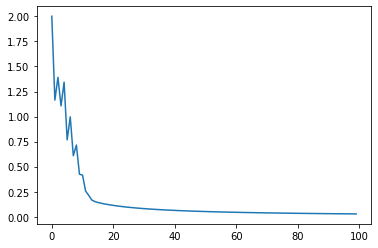

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [19]:
# The result of Linear-Bound.
h = net(X)

# Show prediction of 'y=1' that apply Sigmoid-Function.
prob = nn.functional.sigmoid(h)

/home/kkw/miniconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [20]:
# Predict 'class1' when probabality beyond 0.5, otherwise predict as 0.
# There is no 'bool' phrase in Pytorch, so ByteTensor will print out.
y_pred = prob > 0.5

In [21]:
# Check Prediction result 
# ('y' is FloatTensor, so compare ByteTensor after convert it.)
(y.byte() == y_pred.view_as(y)).sum().item()

100